In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [4]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [5]:
X = df.drop(columns=["Survived"])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [7]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)
X_train['Fare_999'] = X_train['Age'].fillna(999)
X_train['Fare_minus1'] = X_train['Age'].fillna(-1)

In [8]:
X_train.sample(3)

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
413,NaN,0.000,0,99.0,-1.0,999.0,-1.0
744,31.0,7.925,0,31.0,31.0,31.0,31.0
520,30.0,NaN,0,30.0,30.0,30.0,30.0


In [9]:
print(X_train['Age'].var())
print(X_train['Age_99'].var())
print(X_train['Age_minus1'].var())
print(X_train['Fare'].var())
print(X_train['Fare_999'].var())
print(X_train['Fare_minus1'].var())

210.2517072477435
932.9665366701432
315.9955036260055
2761.0314349486343
148855.21230540858
315.9955036260055


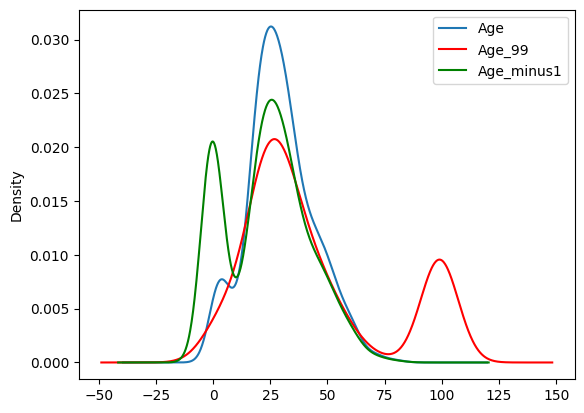

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

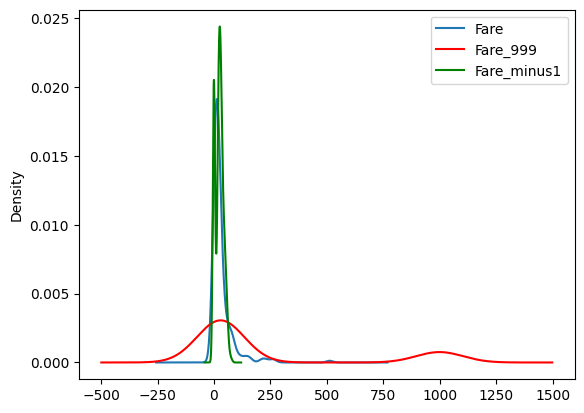

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [12]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,210.251707,210.251707
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,-2341.722703,135.785804
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,-24.108815,-5.034556
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,10827.811509,-166.460682
Age_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,-4508.566357,315.995504
Fare_999,210.251707,-2341.722703,-24.108815,10827.811509,-4508.566357,148855.212305,-4508.566357
Fare_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,-4508.566357,315.995504


In [13]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,1.000000,1.000000
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,-0.114825,0.145071
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,-0.037139,-0.168329
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,0.918810,-0.306576
Age_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,-0.657379,1.000000
Fare_999,1.000000,-0.114825,-0.037139,0.918810,-0.657379,1.000000,-0.657379
Fare_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,-0.657379,1.000000


### Using Sklearn

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [16]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [17]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,99


In [18]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [19]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [20]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [21]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    , 999.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]], shape=(712, 3))